# Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

# Import Dataset

In [2]:
df = pd.read_csv("stroke-prediction.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Drop Rows

In [7]:
#Fiest i will drorp the row number 3116 beacuse only oen
#row in dataset witch columns gender features assigned as 
#a other so if i add this row then latter on it beacue of 
#less amount of data on tehta particular features outcome will not be proper
df.drop(3116,axis=0,inplace=True)
df[df["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


# Cleaning of Data
  In this process will covert the object type column into int column
  just by getting the dummies value so machine can understand

In [8]:
#Gender column dummies
Gender=pd.get_dummies(df["gender"],drop_first=True)

In [9]:
Gender

,Male
0,1
1,0
2,1
3,0
4,0
...,...
5105,0
5106,0
5107,0
5108,1


In [10]:
df=pd.concat([df,Gender],axis=1)

In [11]:
df.drop(columns={"gender"},axis=1,inplace=True)

In [12]:
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [13]:
#Now i will create dummies for ever_married columns and concat them with the features data
df["ever_married"].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [14]:
Ever_Married=pd.get_dummies(df["ever_married"],drop_first=True)
df=pd.concat([df,Ever_Married],axis=1)
df.drop(columns={"ever_married"},axis=1,inplace=True)

In [15]:
df=df.rename(columns={"Yes":"Ever_Married","Male":"Gender"})

In [16]:
df.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Ever_Married
0,9046,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,51676,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,31112,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1,1
3,60182,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,1
4,1665,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


In [17]:
#Work type columns change
df["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [18]:
#In this column there have total 5
#features so i will assigned value to it individually by using map function

In [19]:
df["work_type"]=df["work_type"].map({"Private":1,"Self-employed":2,"children":3,"Govt_job":4,"Never_worked":5})

In [20]:
df.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Ever_Married
0,9046,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,1,1
1,51676,61.0,0,0,2,Rural,202.21,NaN,never smoked,1,0,1
2,31112,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,1,1
3,60182,49.0,0,0,1,Urban,171.23,34.4,smokes,1,0,1
4,1665,79.0,1,0,2,Rural,174.12,24.0,never smoked,1,0,1


In [21]:
#residence_type columns changing 
df["Residence_type"].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [22]:
Residence_Type=pd.get_dummies(df["Residence_type"],drop_first=True)
df=pd.concat([df,Residence_Type],axis=1)

In [23]:
df=df.rename(columns={"Urban":"Residence_Type"})
df.drop(columns={"Residence_type"},axis=1,inplace=True)

In [24]:
df

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Ever_Married,Residence_Type
0,9046,67.0,0,1,1,228.69,36.6,formerly smoked,1,1,1,1
1,51676,61.0,0,0,2,202.21,NaN,never smoked,1,0,1,0
2,31112,80.0,0,1,1,105.92,32.5,never smoked,1,1,1,0
3,60182,49.0,0,0,1,171.23,34.4,smokes,1,0,1,1
4,1665,79.0,1,0,2,174.12,24.0,never smoked,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,83.75,NaN,never smoked,0,0,1,1
5106,44873,81.0,0,0,2,125.20,40.0,never smoked,0,0,1,1
5107,19723,35.0,0,0,2,82.99,30.6,never smoked,0,0,1,0
5108,37544,51.0,0,0,1,166.29,25.6,formerly smoked,0,1,1,0


In [25]:
#Now let's check smokingstatus columns
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [26]:
df["smoking_status"]=df["smoking_status"].map({"never smoked":1,"Unknown":2,"formerly smoked":3,"smokes":4})

# Checking for Missing values

In [27]:
df.isnull().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
Gender                 0
Ever_Married           0
Residence_Type         0
dtype: int64

In [28]:
#In features data bmi colums have missing value 
#so i have to replace those missing by statistical operation

In [29]:
df.describe()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Ever_Married,Residence_Type
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,1.832257,106.140399,28.89456,2.111568,0.048738,0.413975,0.656293,0.508123
std,21162.008804,22.613575,0.296633,0.226084,1.109972,45.285004,7.85432,1.071852,0.215340,0.492592,0.474991,0.499983
min,67.000000,0.080000,0.000000,0.000000,1.000000,55.120000,10.30000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,1.000000,77.240000,23.50000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,1.000000,91.880000,28.10000,2.000000,0.000000,0.000000,1.000000,1.000000
75%,54643.000000,61.000000,0.000000,0.000000,3.000000,114.090000,33.10000,3.000000,0.000000,1.000000,1.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,5.000000,271.740000,97.60000,4.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df["bmi"].mean()

28.894559902200502

In [31]:
df["bmi"].median()

28.1

<Figure size 1600x1400 with 0 Axes>

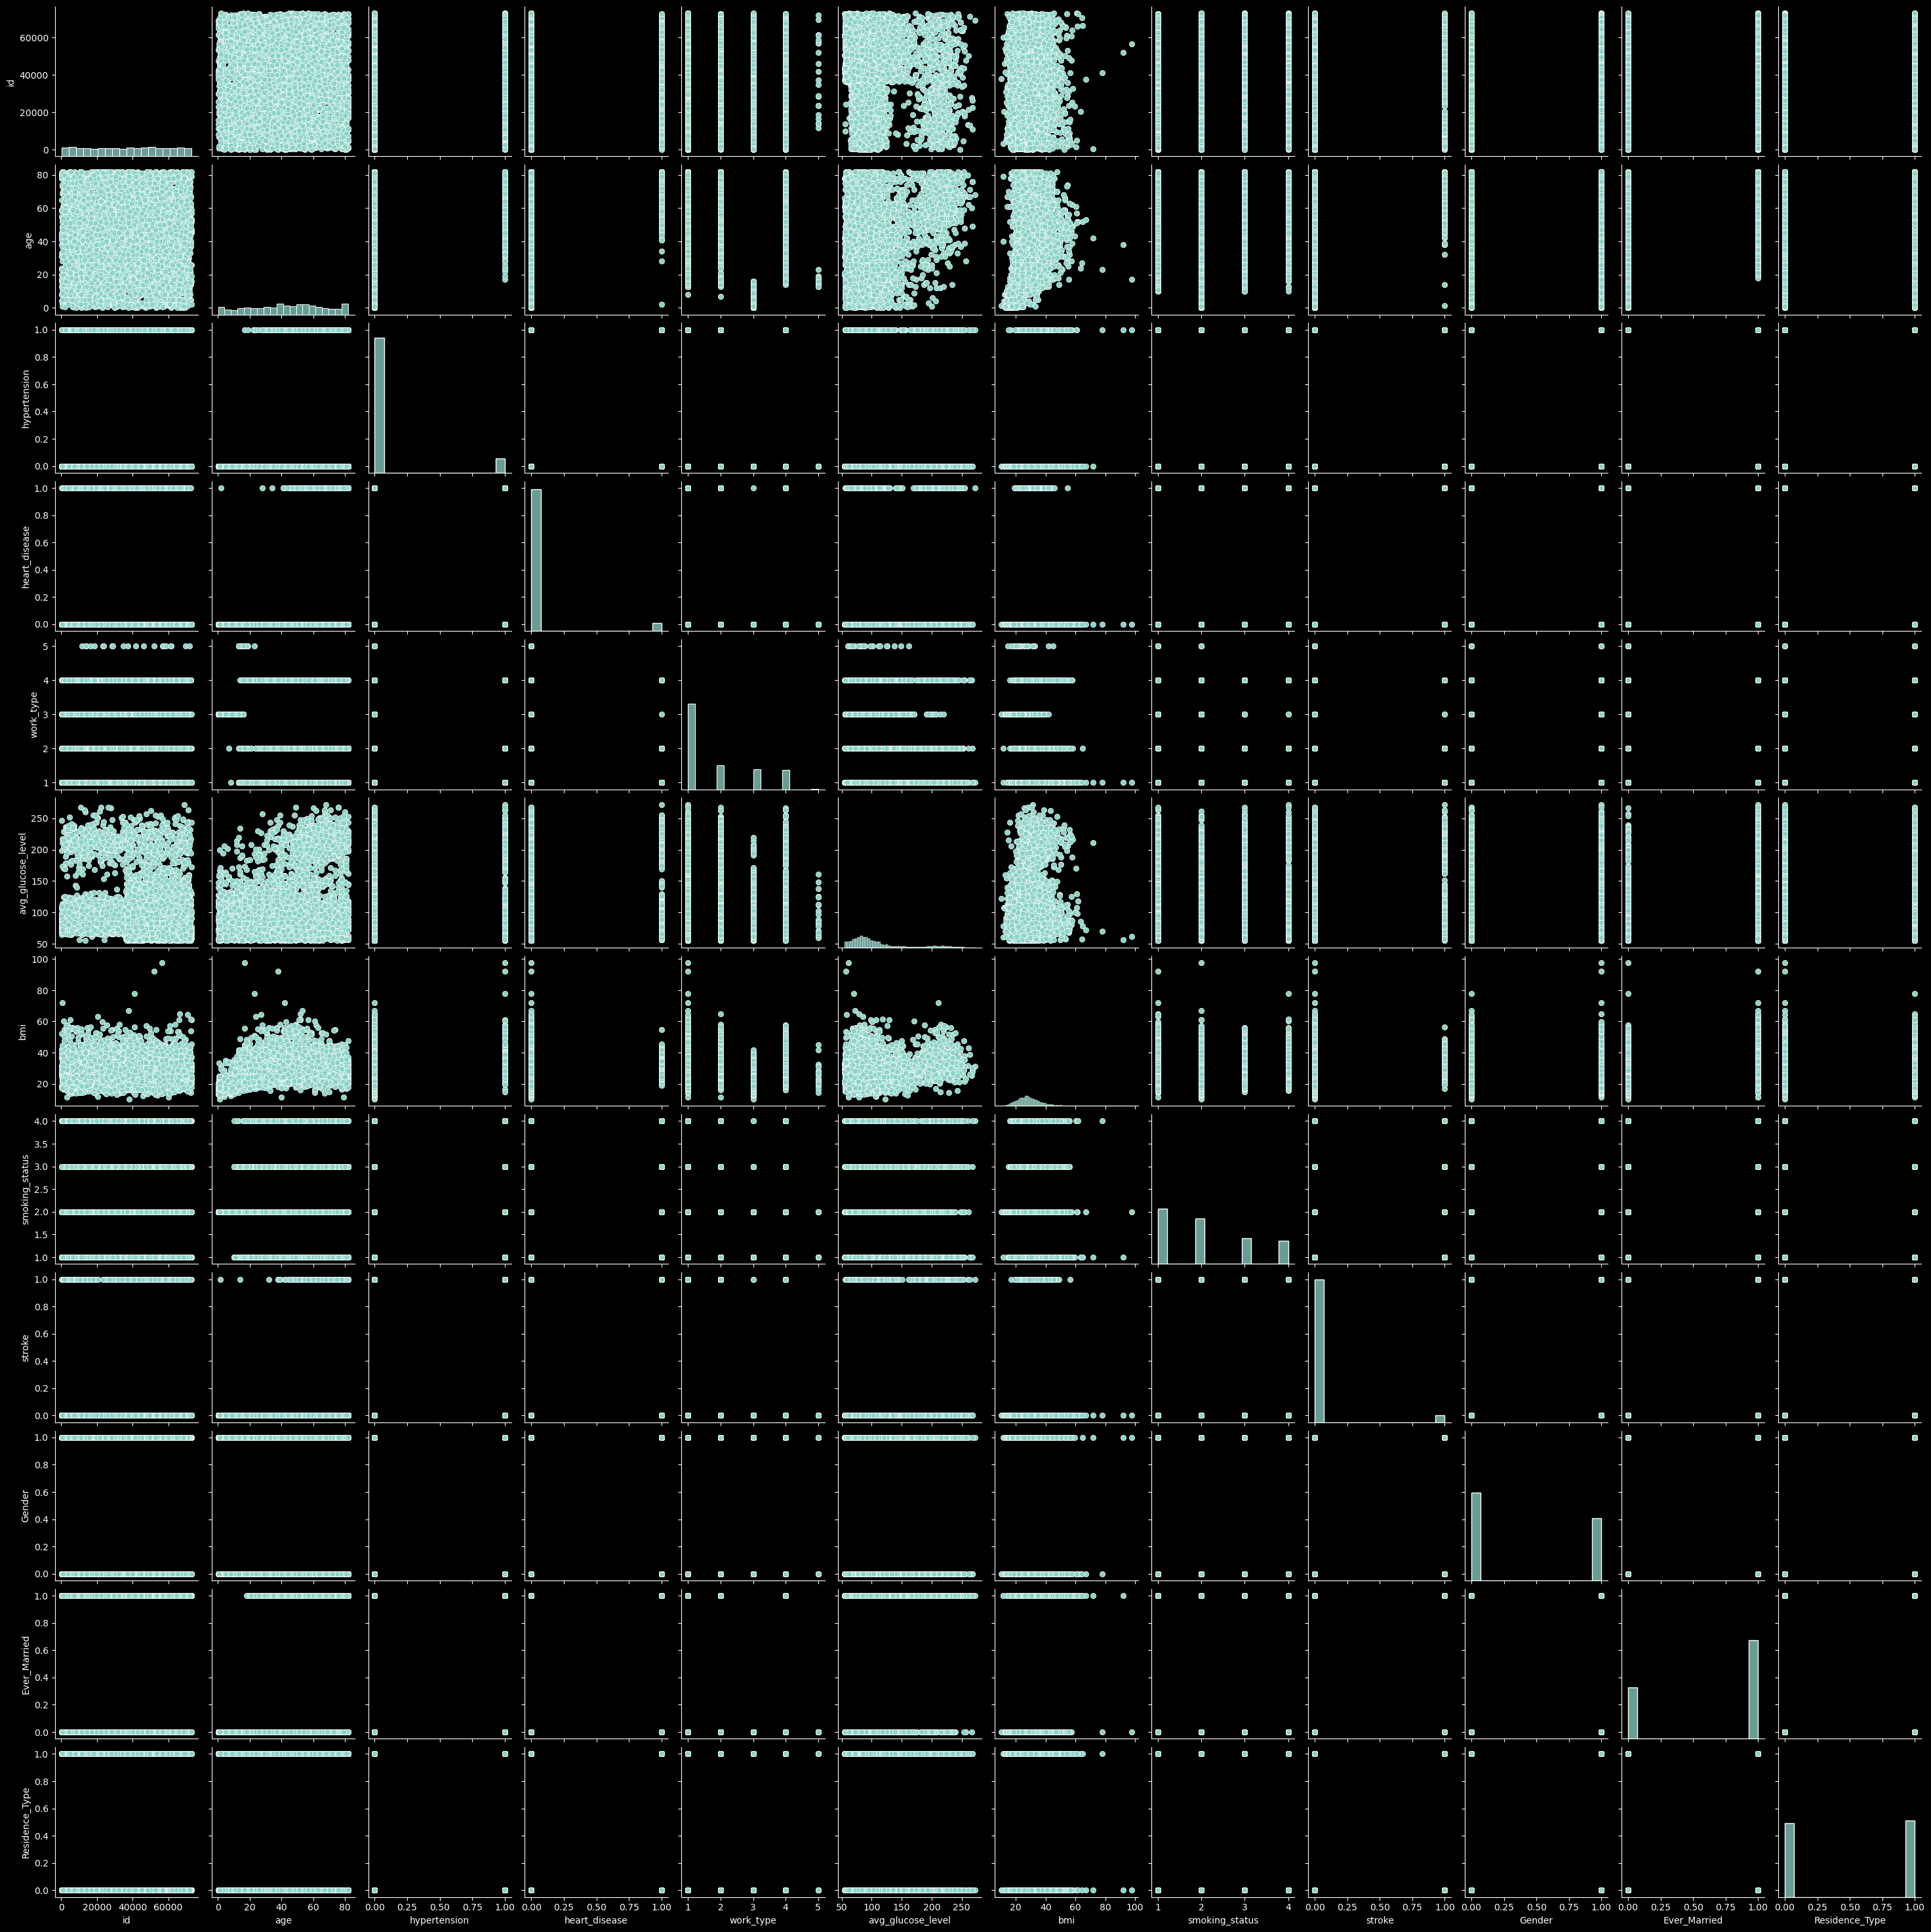

In [32]:
plt.figure(figsize=(16,14))
sns.pairplot(df)

C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

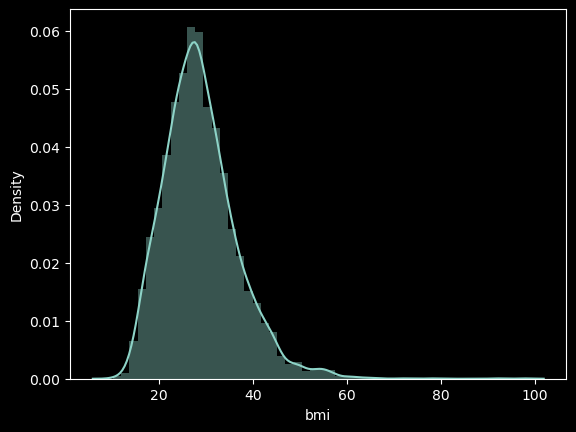

In [33]:
sns.distplot(df['bmi'])

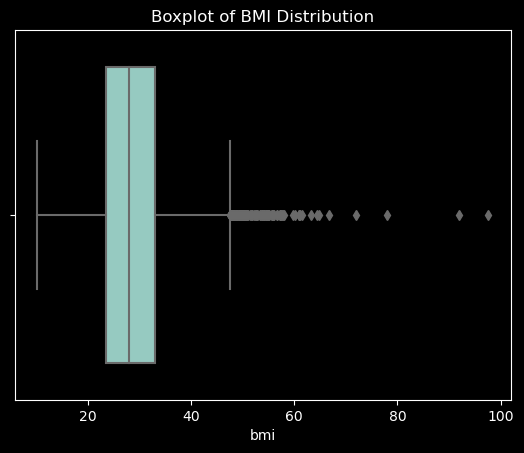

In [34]:
sns.boxplot(data=df,x=df["bmi"])
plt.title("Boxplot of BMI Distribution");

 # Missing Values Filling With Mean

In [35]:
#I will fill the bmi column missing values with mean avlue of bmi column
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [36]:
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Ever_Married,Residence_Type
0,9046,67.0,0,1,1,228.69,36.60000,3,1,1,1,1
1,51676,61.0,0,0,2,202.21,28.89456,1,1,0,1,0
2,31112,80.0,0,1,1,105.92,32.50000,1,1,1,1,0
3,60182,49.0,0,0,1,171.23,34.40000,4,1,0,1,1
4,1665,79.0,1,0,2,174.12,24.00000,1,1,0,1,0


In [37]:
df.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Gender               0
Ever_Married         0
Residence_Type       0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   work_type          5109 non-null   int64  
 5   avg_glucose_level  5109 non-null   float64
 6   bmi                5109 non-null   float64
 7   smoking_status     5109 non-null   int64  
 8   stroke             5109 non-null   int64  
 9   Gender             5109 non-null   uint8  
 10  Ever_Married       5109 non-null   uint8  
 11  Residence_Type     5109 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 543.1 KB


# Correlation Checking

In [39]:
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Ever_Married,Residence_Type
0,9046,67.0,0,1,1,228.69,36.60000,3,1,1,1,1
1,51676,61.0,0,0,2,202.21,28.89456,1,1,0,1,0
2,31112,80.0,0,1,1,105.92,32.50000,1,1,1,1,0
3,60182,49.0,0,0,1,171.23,34.40000,4,1,0,1,1
4,1665,79.0,1,0,2,174.12,24.00000,1,1,0,1,0


In [40]:
corr_metrics=df.corr()
data_corr=corr_metrics["stroke"].sort_values(ascending=False)
data_corr

stroke               1.000000
age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
Ever_Married         0.108299
bmi                  0.038917
smoking_status       0.030721
Residence_Type       0.015415
Gender               0.009081
id                   0.006430
work_type           -0.032133
Name: stroke, dtype: float64

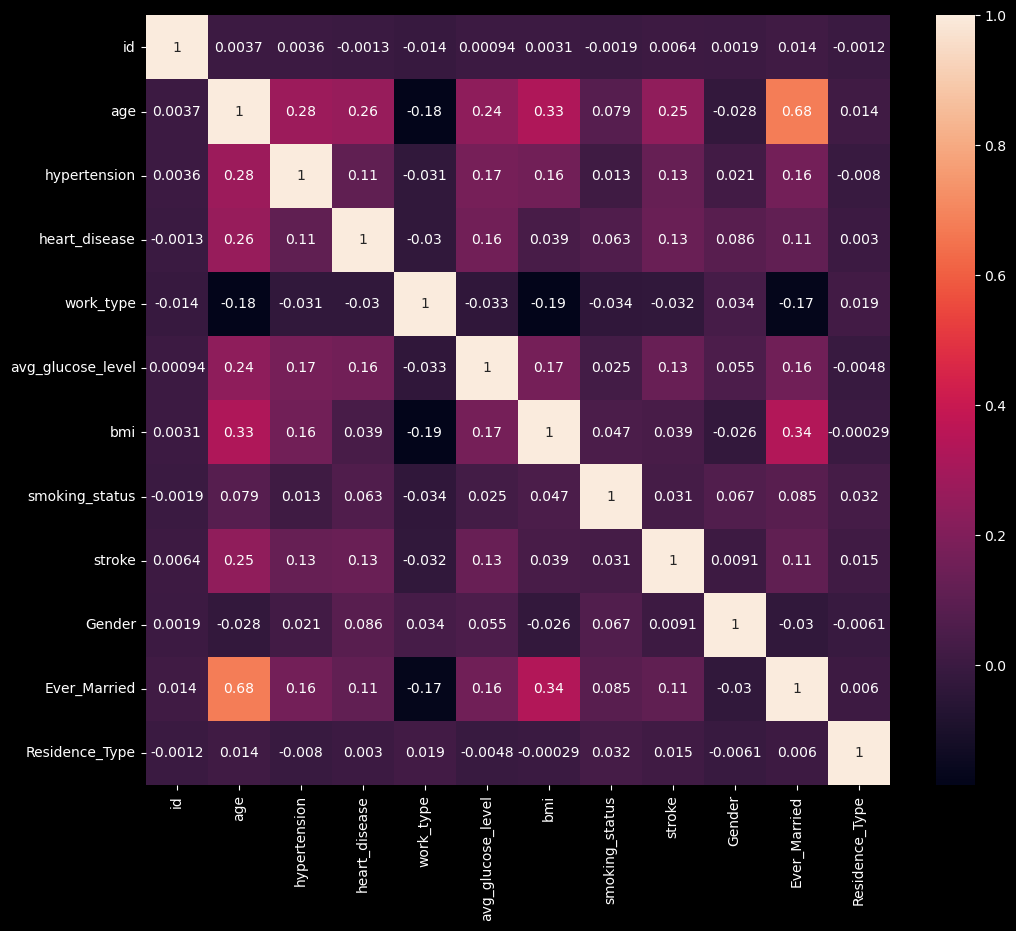

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_metrics, annot = True);

In [42]:
#unwanted columns drop id
df.drop(columns={"id"},axis=1,inplace=True)

# Split the Data into Features and Labels

In [43]:
x=df.drop(columns={"stroke"},axis=1)
y=df.iloc[:,-4]

In [44]:
x.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,Gender,Ever_Married,Residence_Type
0,67.0,0,1,1,228.69,36.60000,3,1,1,1
1,61.0,0,0,2,202.21,28.89456,1,0,1,0
2,80.0,0,1,1,105.92,32.50000,1,1,1,0
3,49.0,0,0,1,171.23,34.40000,4,0,1,1
4,79.0,1,0,2,174.12,24.00000,1,0,1,0


In [45]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
x_train.shape

(4087, 10)

In [48]:
y_train.shape

(4087,)

In [49]:
x_test.shape

(1022, 10)

In [50]:
y_test.shape

(1022,)

# Features Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [52]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model Building

In [53]:
#Importing Libaries
import keras
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout

In [66]:
classifier = Sequential()

#Added the input layers and first hidden layer
classifier.add(Dense(units=20,kernel_initializer="he_uniform",activation="relu",input_dim=10))

#Adding second hidden layer
classifier.add(Dense(units=40,kernel_initializer="he_uniform",activation="relu"))

#Adding third hidden layer
classifier.add(Dense(units=60,kernel_initializer="he_uniform",activation="relu"))

#Fourth output layer adding
classifier.add(Dense(units=1,kernel_initializer="normal",activation="linear"))

#Compile-->
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=120,epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 24ms/step - loss: 0.4846 - accuracy: 0.9339 - val_loss: 0.5331 - val_accuracy: 0.9489
Epoch 2/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3771 - accuracy: 0.9496 - val_loss: 0.3633 - val_accuracy: 0.9325
Epoch 3/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3094 - accuracy: 0.9423 - val_loss: 0.3553 - val_accuracy: 0.9081
Epoch 4/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3309 - accuracy: 0.9419 - val_loss: 0.5388 - val_accuracy: 0.9444
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 0.3222 - accuracy: 0.9543 - val_loss: 0.3721 - val_accuracy: 0.9422
Epoch 6/200
23/23 [==============================] - 0s 7ms/step - loss: 0.3013 - accuracy: 0.9543 - val_loss: 0.4191 - val_accuracy: 0.9489
Epoch 7/200
23/23 [==============================] - 0s 7ms/step - loss: 0.2757 - accuracy: 0.9554 - val_loss: 0.3132 - val_accuracy: 0.9481
Epoch 8/200


In [55]:
x_test[1]

array([-0.13592489, -0.3201699 , -0.23038903,  0.14529418, -0.89974069,
       -0.07860834, -1.04199206,  1.19515759,  0.72889308, -1.01802392])

In [56]:
prediction=classifier.predict([[-0.13592489, -0.3201699 , -0.23038903,  0.14529418, -0.89974069,
                               -0.07860834, -1.04199206,  1.19515759,  0.72889308, -1.01802392]])

1/1 [==============================] - 0s 223ms/step


In [57]:
if(prediction==1):
    print("Patient had a stroke.")
else:
    print("Patient is good.")

Patient is good.


In [58]:
#Let's check y_test for cross check
#first y_test value is also 0 it means model giev the accurate result

# Checking Model on Random values

In [59]:
data_prepare=[50,0,1,2,170.00,17.800,2,1,0,0]

In [60]:
prepared=scaler.transform([data_prepare])

C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [61]:
prepared

array([[ 0.30625944, -0.3201699 ,  4.34048452,  0.14529418,  1.4055247 ,
        -1.43328571, -0.10971939,  1.19515759, -1.37194333, -1.01802392]])

In [62]:
m=classifier.predict(prepared)

1/1 [==============================] - 0s 307ms/step


In [63]:
if(m==1):
    print("Patient had a stroke.")
else:
    print("Patient is good.")

Patient is good.


Accuracy of the model is: 98.87%